In [110]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download mlg-ulb/creditcardfraud
! unzip creditcardfraud.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
###############################################################################################
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
###############################################################################################
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import NearestNeighbors

from pprint import pprint
from math import sqrt
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Credit Card Dataset

In [3]:
df = pd.read_csv('creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# no null values
df.isnull().sum().max()

0

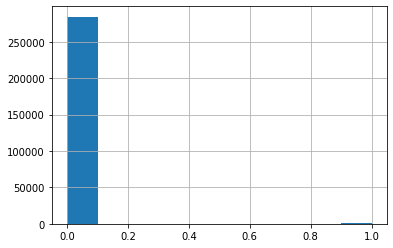

0    284315
1       492
Name: Class, dtype: int64

In [5]:
hist = df['Class'].hist()
plt.show()
df['Class'].value_counts()

In [6]:
X = df.drop(['Class'], axis = 1)
y = df['Class']
X.shape

(284807, 30)

In [7]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 2117
TEST_SET_PROP = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SET_PROP,
                                                    random_state = RANDOM_SEED)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
88883,62334.0,-0.896242,-0.106818,0.713506,-0.998828,0.287400,-1.086304,0.766366,-0.075632,-0.033839,...,-0.179343,0.127866,0.255444,0.078431,0.386769,-0.574850,0.795060,-0.099473,0.229974,80.00
264268,161344.0,2.006268,-0.157982,-3.199315,-0.594284,2.674778,3.015109,-0.356381,0.720066,0.437740,...,-0.090000,0.204851,0.601916,0.002056,0.637831,0.282224,-0.082584,0.012935,-0.034375,23.00
116295,74219.0,-0.638702,0.318575,0.996004,-0.712339,-0.548571,0.076034,-0.383329,0.654718,-1.392730,...,-0.671358,-0.046782,0.048483,0.015836,-0.589587,-0.627142,-0.548012,0.087444,0.111232,32.00
3878,3431.0,-0.411196,1.058416,1.391688,0.094177,0.015424,-0.705622,0.623419,0.065370,-0.364254,...,0.051901,-0.217784,-0.546209,0.064831,0.338212,-0.288922,0.082583,0.259279,0.097526,5.49
84047,60140.0,1.057529,-0.127356,0.900452,1.577774,-0.565966,0.298478,-0.332411,0.156855,0.846328,...,-0.126203,-0.064373,0.122969,-0.100207,0.115336,0.607090,-0.262013,0.067994,0.028500,40.00


## Logistic Reg fitting

### logistic with l2, adjusted class weight

In [82]:
# will use l2 regularization
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

pipe_log_l1 = Pipeline(steps = [('scaler', StandardScaler()),
                                ('logistic',LogisticRegression(penalty = 'l2', class_weight='balanced', random_state = RANDOM_SEED, max_iter = 1000,
                                                               solver='lbfgs',n_jobs=-1))]) 

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=RANDOM_SEED)
    
param_grid = {'logistic__C':[0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=pipe_log_l1,
                           param_grid=param_grid,
                           scoring='average_precision',
                           cv=stratified_kfold)

grid_search.fit(X_train, y_train)
pprint(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([2.48907914, 3.31287556, 4.08096662, 3.48538957, 3.15280633]),
 'mean_score_time': array([0.03683   , 0.03413782, 0.0488698 , 0.03241539, 0.03881273]),
 'mean_test_score': array([0.76045143, 0.761769  , 0.75982428, 0.7598821 , 0.75988876]),
 'param_logistic__C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'logistic__C': 0.01},
            {'logistic__C': 0.1},
            {'logistic__C': 1},
            {'logistic__C': 10},
            {'logistic__C': 100}],
 'rank_test_score': array([2, 1, 5, 4, 3], dtype=int32),
 'split0_test_score': array([0.73330466, 0.73640936, 0.73735897, 0.73735408, 0.73735409]),
 'split1_test_score': array([0.67995847, 0.68784423, 0.68957177, 0.68976529, 0.68976567]),
 'split2_test_score': array([0.81812105, 0.821012  , 0.82092323, 0.82082806, 0.82086049]),
 'split3_test_score': array([0.75830038, 0.75139172, 0.73940539, 0

In [83]:
pipe = Pipeline(steps = [('scaler', StandardScaler()),
                         ('logistic',LogisticRegression(penalty = 'l2', class_weight='balanced', random_state = RANDOM_SEED, max_iter = 1000,
                                                        solver='lbfgs',n_jobs=-1, C = 0.1))])

In [84]:
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
acc0 = t0/(t0 + f1)
acc1 = t1/(t1 + f0)
g_mean = sqrt(acc0*acc1)
prec0 = t0/(t0 + f0)
prec1 = t1/(t1 + f1)
f_sc = 2*prec1*acc1/(prec1+acc1)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

[97.79297974113675, 88.77551020408163, 93.17522026213211, 12.083333333333334, 99.98022294138799, 6.482861400894188, 96.97242184718569, 65.0819866121964]


### logistic with l2, no adjustments for class imbalance

In [85]:
pipe_log_l2 = Pipeline(steps = [('scaler', StandardScaler()),
                                ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                               solver='lbfgs',n_jobs=-1))]) 

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=RANDOM_SEED)
    
param_grid = {'logistic__C':[0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=pipe_log_l2,
                           param_grid=param_grid,
                           scoring='average_precision',
                           cv=stratified_kfold)

grid_search.fit(X_train, y_train)
pprint(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([1.93158383, 3.10896821, 3.37142639, 2.93865519, 3.29592261]),
 'mean_score_time': array([0.0309495 , 0.03196282, 0.03117023, 0.03075547, 0.03024516]),
 'mean_test_score': array([0.7741599 , 0.7776915 , 0.77798766, 0.7778202 , 0.77778348]),
 'param_logistic__C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'logistic__C': 0.01},
            {'logistic__C': 0.1},
            {'logistic__C': 1},
            {'logistic__C': 10},
            {'logistic__C': 100}],
 'rank_test_score': array([5, 4, 1, 2, 3], dtype=int32),
 'split0_test_score': array([0.74854145, 0.75313193, 0.75616661, 0.75592883, 0.75600905]),
 'split1_test_score': array([0.69326636, 0.6976374 , 0.70026869, 0.70080666, 0.70071444]),
 'split2_test_score': array([0.82943297, 0.83691423, 0.83972879, 0.83967415, 0.83967284]),
 'split3_test_score': array([0.76469991, 0.7653256 , 0.76208358, 0

In [86]:
pipe = Pipeline(steps = [('scaler', StandardScaler()),
                         ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                        solver='lbfgs',n_jobs=-1, C = 0.1))])

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
acc0 = t0/(t0 + f1)
acc1 = t1/(t1 + f0)
g_mean = sqrt(acc0*acc1)
prec0 = t0/(t0 + f0)
prec1 = t1/(t1 + f1)
f_sc = 2*prec1*acc1/(prec1+acc1)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

[99.97889701744514, 53.06122448979592, 72.8354494657982, 64.19753086419753, 99.91915357306056, 81.25, 96.93274608661697, 69.13750262584375]


### logistic with l2, smote

In [9]:
from imblearn.pipeline import Pipeline as imbpipeline

In [89]:
from imblearn.pipeline import Pipeline as imbpipeline
pipe_log_l3 = imbpipeline(steps = [('smote', SMOTE(random_state=RANDOM_SEED)),
                                   ('scaler', StandardScaler()),
                                   ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                                  solver='lbfgs',n_jobs=-1))]) 

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=RANDOM_SEED)
    
param_grid = {'logistic__C':[0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=pipe_log_l3,
                           param_grid=param_grid,
                           scoring='average_precision',
                           cv=stratified_kfold)

grid_search.fit(X_train, y_train)
pprint(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([ 7.45805035, 11.43012671, 13.06121693, 13.33958592, 12.06928082]),
 'mean_score_time': array([0.04397645, 0.03381333, 0.03337069, 0.03054004, 0.03056669]),
 'mean_test_score': array([0.77063185, 0.77239071, 0.7669996 , 0.76638153, 0.76637205]),
 'param_logistic__C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'logistic__C': 0.01},
            {'logistic__C': 0.1},
            {'logistic__C': 1},
            {'logistic__C': 10},
            {'logistic__C': 100}],
 'rank_test_score': array([2, 1, 3, 4, 5], dtype=int32),
 'split0_test_score': array([0.7380302 , 0.7430408 , 0.74242965, 0.74152981, 0.74152917]),
 'split1_test_score': array([0.69771186, 0.70738199, 0.70548057, 0.70514636, 0.70514201]),
 'split2_test_score': array([0.82860432, 0.83039162, 0.82983845, 0.82989816, 0.82991271]),
 'split3_test_score': array([0.77042646, 0.76560582, 0.742605

In [90]:
pipe = imbpipeline(steps = [('smote', SMOTE(random_state=RANDOM_SEED)),
                            ('scaler', StandardScaler()),
                            ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                           solver='lbfgs',n_jobs=-1, C = 0.1))]) 

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
acc0 = t0/(t0 + f1)
acc1 = t1/(t1 + f0)
g_mean = sqrt(acc0*acc1)
prec0 = t0/(t0 + f0)
prec1 = t1/(t1 + f1)
f_sc = 2*prec1*acc1/(prec1+acc1)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

[99.12070906021384, 86.73469387755102, 92.72111063432882, 24.890190336749637, 99.97694095109708, 14.529914529914532, 96.97949206413008, 67.73697625055887]


### logistic with l2, random oversampling

In [93]:
from imblearn.pipeline import Pipeline as imbpipeline
pipe_log_l4 = imbpipeline(steps = [('ros', RandomOverSampler(random_state=RANDOM_SEED)),
                                   ('scaler', StandardScaler()),
                                   ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                                  solver='lbfgs',n_jobs=-1))]) 

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=RANDOM_SEED)
    
param_grid = {'logistic__C':[0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=pipe_log_l4,
                           param_grid=param_grid,
                           scoring='average_precision',
                           cv=stratified_kfold)

grid_search.fit(X_train, y_train)
pprint(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([ 6.3945519 ,  9.42349391, 10.6113152 , 11.773914  , 10.09261041]),
 'mean_score_time': array([0.03046603, 0.03662448, 0.02957196, 0.03175311, 0.03109865]),
 'mean_test_score': array([0.73888957, 0.7595162 , 0.76085425, 0.75997957, 0.75998242]),
 'param_logistic__C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'logistic__C': 0.01},
            {'logistic__C': 0.1},
            {'logistic__C': 1},
            {'logistic__C': 10},
            {'logistic__C': 100}],
 'rank_test_score': array([5, 4, 1, 3, 2], dtype=int32),
 'split0_test_score': array([0.71703274, 0.73411445, 0.73702498, 0.73730908, 0.73731053]),
 'split1_test_score': array([0.65127777, 0.68293017, 0.68926964, 0.69028154, 0.69029363]),
 'split2_test_score': array([0.80023875, 0.81794308, 0.82205058, 0.82132954, 0.82136278]),
 'split3_test_score': array([0.73620642, 0.75268576, 0.743908

In [95]:
pipe = imbpipeline(steps = [('ros', RandomOverSampler(random_state=RANDOM_SEED)),
                                   ('scaler', StandardScaler()),
                                   ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                                  solver='lbfgs',n_jobs=-1, C = 1))]) 

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
acc0 = t0/(t0 + f1)
acc1 = t1/(t1 + f0)
g_mean = sqrt(acc0*acc1)
prec0 = t0/(t0 + f0)
prec1 = t1/(t1 + f1)
f_sc = 2*prec1*acc1/(prec1+acc1)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

[97.77539392234102, 88.77551020408163, 93.16684217499747, 12.0, 99.9802193850027, 6.43491124260355, 96.96287525983945, 64.61038382791915]


### logistic with l2, adasyn, bsmote, svmsmote, rus

In [119]:
methods = [ADASYN(random_state = RANDOM_SEED), BorderlineSMOTE(random_state = RANDOM_SEED),
           SVMSMOTE(random_state = RANDOM_SEED), RandomUnderSampler(random_state = RANDOM_SEED)]

Cvalues = []
for method in methods:
  pipe_log_ = imbpipeline(steps = [('ros', method),
                                   ('scaler', StandardScaler()),
                                   ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                                  solver='lbfgs',n_jobs=-1))])
  stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=RANDOM_SEED)
    
  param_grid = {'logistic__C':[0.01, 0.1, 1, 10, 100]}
  grid_search = GridSearchCV(estimator=pipe_log_,
                           param_grid=param_grid,
                           scoring='average_precision',
                           cv=stratified_kfold)

  grid_search.fit(X_train, y_train)
  print(method)
  c = grid_search.best_params_['logistic__C']
  Cvalues.append(c)
  pipe = imbpipeline(steps = [('method', method),
                              ('scaler', StandardScaler()),
                              ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
                                                             solver='lbfgs',n_jobs=-1, C = c))]) 

  pipe.fit(X_train, y_train)
  predictions = pipe.predict(X_test)
  t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
  acc0 = t0/(t0 + f1)
  acc1 = t1/(t1 + f0)
  g_mean = sqrt(acc0*acc1)
  prec0 = t0/(t0 + f0)
  prec1 = t1/(t1 + f1)
  f_sc = 2*prec1*acc1/(prec1+acc1)
  auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
  auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
  print(c)
  print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

ADASYN(random_state=2117)
0.1
[99.06091727630837, 86.73469387755102, 92.69314071273025, 23.709902370990232, 99.97692703618905, 13.731825525040387, 97.02096229600451, 68.09732934381385]
BorderlineSMOTE(random_state=2117)
1
[99.72214406302757, 80.61224489795919, 89.65949976973073, 47.164179104477604, 99.96650506831203, 33.33333333333333, 94.50383047844912, 66.78621100292716]
SVMSMOTE(random_state=2117)
10
[99.80831457512662, 79.59183673469387, 89.12871074142409, 54.73684210526315, 99.96477322765301, 41.711229946524064, 94.23056838801926, 65.73388033043783]
RandomUnderSampler(random_state=2117)
0.01
[99.83996904895892, 78.57142857142857, 88.56957150570345, 57.89473684210527, 99.96302426312639, 45.83333333333333, 93.83534505529842, 63.40510573720669]


In [ ]:
# pipe_log_l5 = imbpipeline(steps = [('ros', SMOTETomek(random_state=RANDOM_SEED)),
#                                    ('scaler', StandardScaler()),
#                                    ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
#                                                                   solver='lbfgs',n_jobs=-1))]) 

# stratified_kfold = StratifiedKFold(n_splits=5,
#                                    shuffle=True,
#                                    random_state=RANDOM_SEED)
    
# param_grid = {'logistic__C':[0.01, 0.1, 1, 10, 100]}
# grid_search = GridSearchCV(estimator=pipe_log_l5,
#                            param_grid=param_grid,
#                            scoring='average_precision',
#                            cv=stratified_kfold)

# grid_search.fit(X_train, y_train)
# pprint(grid_search.cv_results_)
# print(grid_search.best_params_)

In [109]:
# sm = SMOTE(random_state = RANDOM_SEED, k_neighbors= NearestNeighbors(n_neighbors=5, algorithm="kd_tree"))
# pipe = imbpipeline(steps = [('ros', SMOTEENN(random_state=RANDOM_SEED)),
#                                    ('scaler', StandardScaler()),
#                                    ('logistic',LogisticRegression(penalty = 'l2', class_weight='none', random_state = RANDOM_SEED, max_iter = 1000,
#                                                                   solver='lbfgs',n_jobs=-1, C = 1))]) 

# pipe.fit(X_train, y_train)
# predictions = pipe.predict(X_test)
# t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
# acc0 = t0/(t0 + f1)
# acc1 = t1/(t1 + f0)
# g_mean = sqrt(acc0*acc1)
# prec0 = t0/(t0 + f0)
# prec1 = t1/(t1 + f1)
# f_sc = 2*prec1*acc1/(prec1+acc1)
# auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
# auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
# print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

## SVM (l2 reg)

In [ ]:
from sklearn.preprocessing import RobustScaler

# methods = [RandomOverSampler(random_state = RANDOM_SEED), SMOTE(random_state = RANDOM_SEED),
#            ADASYN(random_state = RANDOM_SEED), BorderlineSMOTE(random_state = RANDOM_SEED),
#            SVMSMOTE(random_state = RANDOM_SEED), RandomUnderSampler(random_state = RANDOM_SEED)]

# Cvalues = []
# for method in methods:
#   pipe_log_ = imbpipeline(steps = [('method', method),
#                                    ('scaler', RobustScaler()),
#                                    ('svm',LinearSVC(penalty = 'l2', class_weight='balanced', random_state = RANDOM_SEED, max_iter = 1000))])
#   stratified_kfold = StratifiedKFold(n_splits=5,
#                                    shuffle=True,
#                                    random_state=RANDOM_SEED)
    
#   param_grid = {'svm__C':[0.01, 0.1, 1, 10, 100]}
#   grid_search = GridSearchCV(estimator=pipe_log_,
#                            param_grid=param_grid,
#                            scoring='average_precision',
#                            cv=stratified_kfold)

#   grid_search.fit(X_train, y_train)
#   print(method)
#   c = grid_search.best_params_['svm__C']
#   Cvalues.append(c)
#   pipe = imbpipeline(steps = [('method', method),
#                               ('scaler', RobustScaler()),
#                               ('logistic',LinearSVC(penalty = 'l2', class_weight='balanced', random_state = RANDOM_SEED, max_iter = 1000,
#                                                     C = c))]) 

#   pipe.fit(X_train, y_train)
#   predictions = pipe.predict(X_test)
#   t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
#   acc0 = t0/(t0 + f1)
#   acc1 = t1/(t1 + f0)
#   g_mean = sqrt(acc0*acc1)
#   prec0 = t0/(t0 + f0)
#   prec1 = t1/(t1 + f1)
#   f_sc = 2*prec1*acc1/(prec1+acc1)
#   auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
#   auc_pr = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
#   print(c)
#   print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
pipe_rf_SMOTE = Pipeline(steps = [('smote', SMOTE(random_state = RANDOM_SEED)),
                                  ('rf', RandomForestClassifier(random_state = RANDOM_SEED))])

## Random Search with Cross Validation

In [9]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
#n_estimators = [10, 20, 30]
n_estimators = [50, 100, 150, 200]
# Number of features to consider at every split
#max_features = ['auto','sqrt']
max_features = ['sqrt']
# Maximum number of levels in tree
#max_depth = [4, 5, 6]
max_depth = [5]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 4, 6]
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [2, 4, 6]
#min_samples_leaf = [2, 5]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
#               'rf__min_samples_split': min_samples_split,
#               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
            

pprint(random_grid)

{'rf__bootstrap': [True],
 'rf__max_depth': [5],
 'rf__max_features': ['sqrt'],
 'rf__n_estimators': [50, 100, 150, 200]}


In [21]:
pipe_rf = Pipeline(steps = [('rf',RandomForestClassifier(random_state = RANDOM_SEED,
                                                         max_depth = 5,
                                                         max_features = 'sqrt',
                                                         bootstrap = True,
                                                         n_jobs = -1))]) 

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=RANDOM_SEED)
    
param_grid = {'rf__n_estimators':[50, 100, 150, 200]}

grid_search = GridSearchCV(estimator=pipe_rf,
                           param_grid=param_grid,
                           scoring='average_precision',
                           cv=stratified_kfold)

grid_search.fit(X_train, y_train)
pprint(grid_search.cv_results_)
print(grid_search.best_params_)

KeyboardInterrupt: ignored

In [19]:
a = RandomForestClassifier(random_state = RANDOM_SEED,
                           n_estimators = 100,
                           max_depth = 5,
                           max_features = 'sqrt',
                           bootstrap = True)
a.fit(X_train, y_train)
predictions = a.predict(X_test)
t0, f1, f0, t1 = metrics.confusion_matrix(y_test, predictions).ravel()
acc0 = t0/(t0 + f1)
acc1 = t1/(t1 + f0)
g_mean = sqrt(acc0*acc1)
prec0 = t0/(t0 + f0)
prec1 = t1/(t1 + f1)
f_sc = 2*prec1*acc1/(prec1+acc1)
auc = roc_auc_score(y_test, a.predict_proba(X_test)[:,1])
auc_pr = average_precision_score(y_test, a.predict_proba(X_test)[:,1])
print([100*acc0, 100*acc1, 100*g_mean, 100*f_sc, 100*prec0, 100*prec1, 100*auc, 100*auc_pr])

[99.98593134496342, 69.38775510204081, 83.29345303091827, 78.16091954022988, 99.94726294694652, 89.47368421052632, 95.8697730639808, 76.26710514277367]


In [ ]:
a.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2117,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn import metrics 
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import make_pipeline

# model_rus = make_pipeline(
#     RandomUnderSampler(random_state=RANDOM_SEED),
#     HistGradientBoostingClassifier(random_state=RANDOM_SEED)
# )

def model_resample_pipeline(X_train, X_test, y_train, y_test, model) :
  results = {'ordinary': {},
             'class_weight': {},
             'oversample': {},
             'undersample': {}}
  # ------ No balancing ------
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
  tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
  fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
  auc = metrics.auc(fpr, tpr)
  
  results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                        'fscore': fscore, 'n_occurences': support,
                        'predictions_count': Counter(predictions),
                        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                        'auc': auc}
  
  # ------ Class weight ------
  if 'class_weight' in model.get_params().keys():
      model.set_params(class_weight='balanced')
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)
      accuracy = metrics.accuracy_score(y_test, predictions)
      precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
      tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
      fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
      auc = metrics.auc(fpr, tpr)

      results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                'fscore': fscore, 'n_occurences': support,
                                'predictions_count': Counter(predictions),
                                'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                'auc': auc}
  
  # ------------ OVERSAMPLING TECHNIQUES ------------
  print('------ Oversampling methods ------')
  techniques = [SMOTE()]
  
  for sampler in techniques:
      technique = sampler.__class__.__name__
      print(f'Technique: {technique}')
      print(f'Before resampling: {sorted(Counter(y_train).items())}')
      X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
      print(f'After resampling: {sorted(Counter(y_resampled).items())}')

      model.fit(X_resampled, y_resampled)
      predictions = model.predict(X_test)
      accuracy = metrics.accuracy_score(y_test, predictions)
      precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
      tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
      fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
      auc = metrics.auc(fpr, tpr)

      results['oversample'][technique] = {'accuracy': accuracy, 
                                          'precision': precision, 
                                          'recall': recall,
                                          'fscore': fscore, 
                                          'n_occurences': support,
                                          'predictions_count': Counter(predictions),
                                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                          'auc': auc}
  # ------------ UNDERSAMPLING TECHNIQUES ------------
  print('------ Undersampling methods ------')
  techniques = [RandomUnderSampler()]

  for sampler in techniques:
      technique = sampler.__class__.__name__
      # if technique == 'NearMiss': technique+=str(sampler.version)
      print(f'Technique: {technique}')
      print(f'Before resampling: {sorted(Counter(y_train).items())}')
      X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
      print(f'After resampling: {sorted(Counter(y_resampled).items())}')

      model.fit(X_resampled, y_resampled)
      predictions = model.predict(X_test)
      accuracy = metrics.accuracy_score(y_test, predictions)
      precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
      tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
      fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
      auc = metrics.auc(fpr, tpr)

      results['undersample'][technique] = {'accuracy': accuracy, 
                                          'precision': precision, 
                                          'recall': recall,
                                          'fscore': fscore, 
                                          'n_occurences': support,
                                          'predictions_count': Counter(predictions),
                                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                          'auc': auc}
      

  return results

In [ ]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title(f'0: \n{metric}')
        ax[i*2+1].set_title(f'1: \n{metric}')
    
    # AUC vis
    ax[6].set_title(f'Area under curve')
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
results = model_resample_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: SMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]


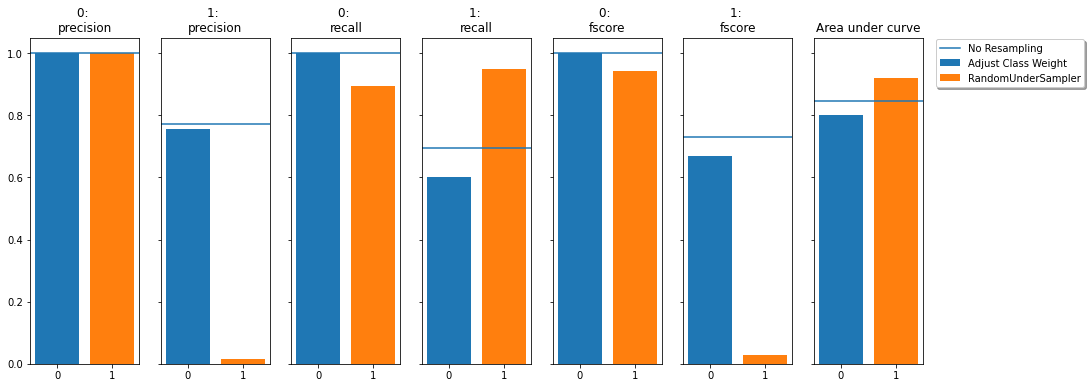

In [ ]:
evaluate_method(results, 'undersample')

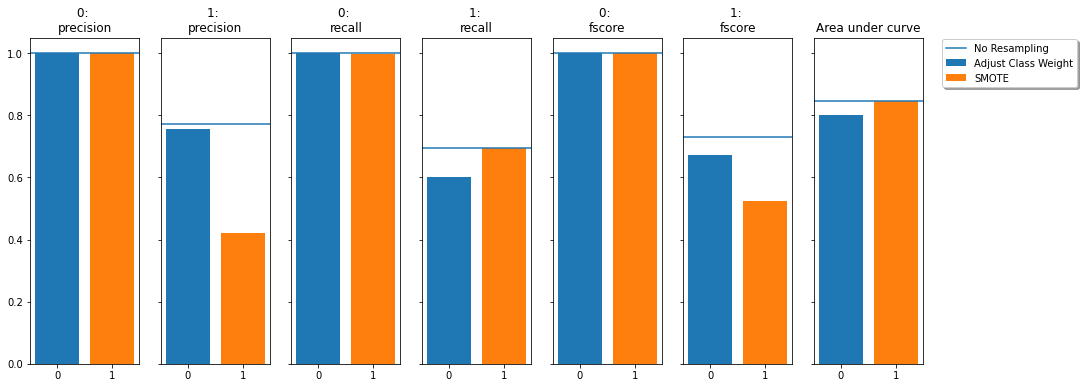

In [ ]:
  evaluate_method(results, 'oversample')